In [1]:
root_dir = "./training-image"
base_dir = root_dir

In [2]:
from fastai.vision.all import *
from fastai.metrics import error_rate
from IPython.display import Image
from pathlib import Path

In [3]:
path = Path(base_dir)
fns = get_image_files(path)
path

Path('training-image')

In [4]:
failed = verify_images(fns)
failed

(#0) []

In [5]:
house_style = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256))

In [8]:
dls = house_style.dataloaders(path)

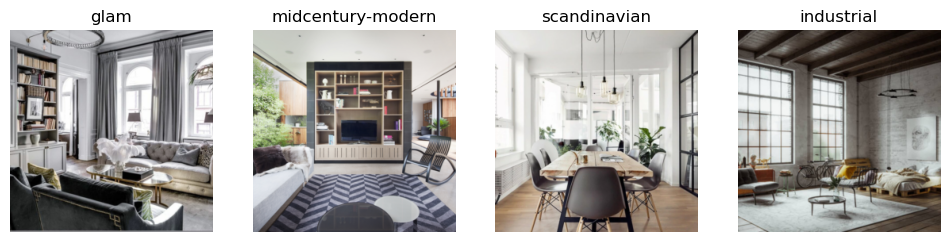

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

In [10]:
house_style = house_style.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = house_style.dataloaders(path)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/Users/claredang/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/claredang/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/claredang/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [12]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,3.451970,4.668355,0.913043,00:09
1,3.277545,3.862400,0.913043,00:08


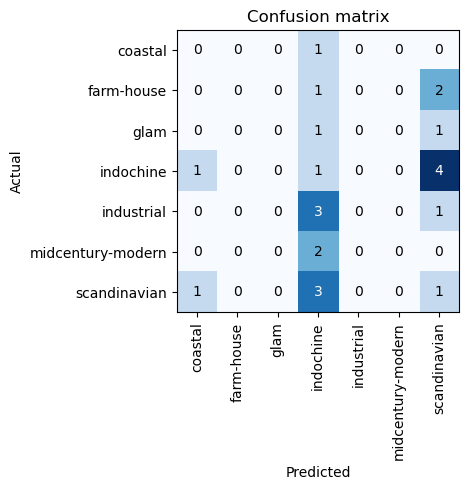

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

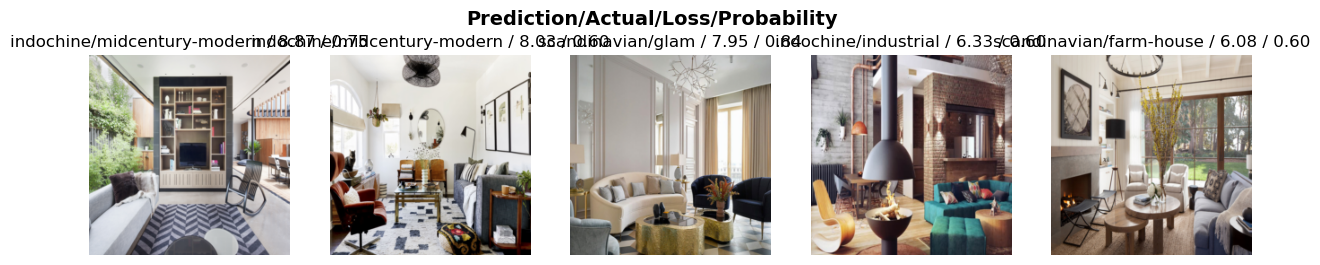

In [14]:
interp.plot_top_losses(5, nrows=1)

In [15]:
learn.export()

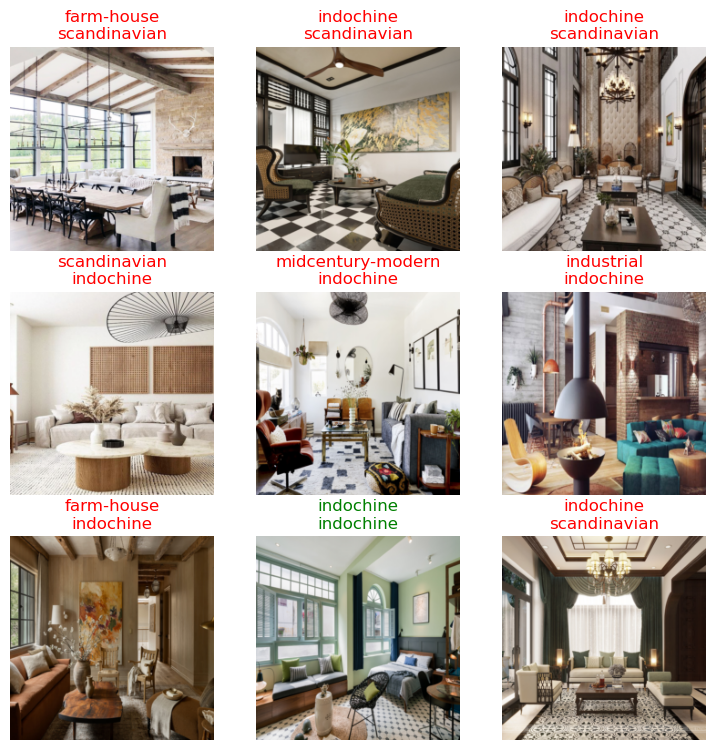

In [16]:
learn.show_results()

In [17]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
category,_,probs = learn.predict(img)
print(f"Category?: {category}.")
print(f"Probability?: {probs[1].item():.6f}")

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
model_export = load_learner(path/'export.pkl')

In [ ]:
model_export.dls.vocab